In [41]:
import numpy as np
import matplotlib.pyplot as plt

prediction at x = 3: [6.91664742]


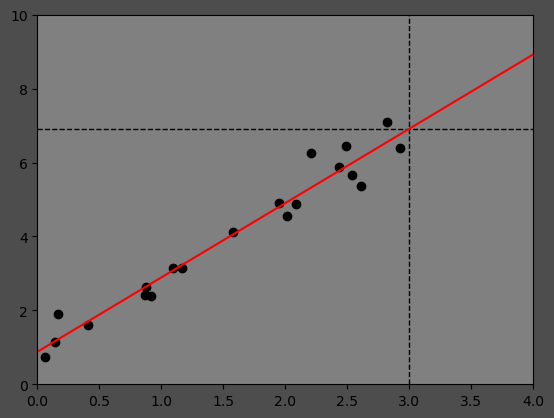

In [42]:
x = 3* np.random.rand(20,1)
y = 2 * x + 0.4*np.random.randn(20,1) +1

mean_x = np.mean(x)
mean_y = np.mean(y)


numer = 0
denom = 0
for i in range(len(x)):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

prediction = lambda x: b0+b1*x

print('prediction at x = 3: {}'.format(prediction(3)))

x_plot = np.linspace(0, 10, 100)
y_plot = b0 + b1*x_plot

plt.figure(facecolor='0.3')
plt.axes().set_facecolor('grey')
plt.axis([0,4,0,10])
plt.axvline(x=3, color='black', linestyle='--',linewidth=1)
plt.axhline(y=prediction(3), color='black', linestyle='--',linewidth=1)

plt.scatter(x,y,c='black')
plt.plot(x_plot,y_plot,c='red')
plt.show()

In [43]:
#my own class LinearRegr

class LinearRegressionModel:
    '''The Input Data has to be a list of tuples representing coordinate pairs'''
    
    def __init__(self,data):
        self.data = data
        self.x, self.y = self.get_coords(data)
        self.b0, self.b1 = self.calc_coeffs(self.x,self.y)
        print('Training Succeeded: b0 = {}, b1 = {}'.format(self.b0,self.b1))
    
    get_coords = lambda self,D: ([point[0] for point in D], [point[1] for point in D])
    predict = lambda self,x: self.b0+self.b1*x

    
    def calc_coeffs(self,x,y):
        mean_x = np.mean(x)
        mean_y = np.mean(y)

        numer = 0
        denom = 0
        for i in range(len(x)):
            numer += (x[i] - mean_x) * (y[i] - mean_y)
            denom += (x[i] - mean_x) ** 2
        b1 = numer / denom
        b0 = mean_y - (b1 * mean_x)

        return b0,b1


    def plot(self):

        x_plot = np.linspace(-100, 100, 100)
        y_plot = self.b0 + self.b1*x_plot

        plt.figure(facecolor='0.3')
        plt.axes().set_facecolor('grey')
        plt.axis([min(self.x)-10,max(self.x)+10,min(self.y)-10,max(self.y)+10]) #make sure the plot will show all dots
        plt.axvline(x=0, color='black', linewidth=1)
        plt.axhline(y=0, color='black', linewidth=1)
        
        plt.scatter(self.x,self.y, c='black',zorder=3)
        plt.plot(x_plot,y_plot, c='red',zorder=2)
        plt.grid(zorder = 1)
        plt.show()
        
        
        
    def show_prediction(self, x):
        
        print('prediction at x = {} : {} '.format(x,self.predict(x)))
        
        x_plot = np.linspace(-100, 100, 100)
        y_plot = self.b0 + self.b1*x_plot

        plt.figure(facecolor='0.3')
        plt.axes().set_facecolor('grey')
        plt.axis([min(self.x)-10,max(self.x)+10,min(self.y)-10,max(self.y)+10]) #make sure the plot will show all dots
        plt.axvline(x=0, color='black', linewidth=1)
        plt.axhline(y=0, color='black', linewidth=1)        
        plt.axvline(x=x, color='black', linestyle='--',linewidth=1)
        plt.axhline(y=self.predict(x), color='black', linestyle='--',linewidth=1)
        
        plt.scatter(x, self.predict(x), zorder = 4, s = 200 ,marker='x',color = 'black')
        plt.scatter(self.x,self.y, c='black',zorder=3)
        plt.plot(x_plot,y_plot, c='red',zorder=2)
        plt.grid(zorder = 1)
        plt.show()


In [44]:
my_data = [(1,1),(4,2),(2,4),(5,6),(6,5),(3,4),(10,10),(31,70)]

In [45]:
myModel = LinearRegressionModel(my_data)

Training Succeeded: b0 = -5.352568875651524, b1 = 2.3358153387937453


In [46]:
myModel.predict(2)

-0.6809381980640339

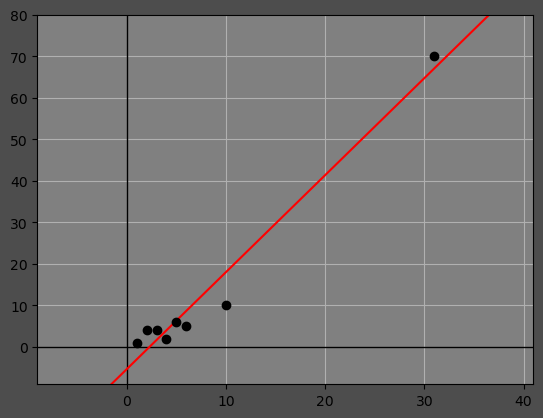

In [47]:
myModel.plot()

prediction at x = 20 : 41.363737900223384 


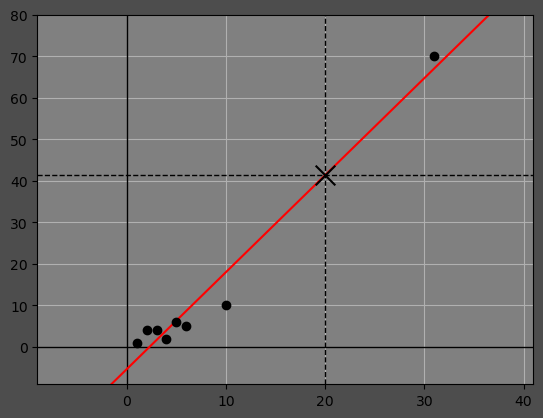

In [48]:
myModel.show_prediction(20)

# Compare to sklearn LinearRegression model

In [49]:
#np_data = np.array(my_data)
#x, y = np.transpose(np_data)[0].reshape(-1,1), np.transpose(np_data)[1].reshape(-1,1)

x, y = map(lambda d: [d[0]], my_data), map(lambda d: [d[1]], my_data)
np_x, np_y = np.array(list(x)), np.array(list(y)) 

x2,y2 = np_x.flatten(), np_y.flatten()
x2,y2

(array([ 1,  4,  2,  5,  6,  3, 10, 31]),
 array([ 1,  2,  4,  6,  5,  4, 10, 70]))

In [50]:
from sklearn.linear_model import LinearRegression

skmodel = LinearRegression()
skmodel.fit(np_x ,np_y)

LinearRegression()

In [51]:
#using np.polyfit 

coeffs = np.polyfit(x2,y2,1)

predict_at_20 = coeffs[0]*20 + coeffs[1]

In [52]:
skmodel.predict([[20]]), myModel.predict(20), predict_at_20

(array([[41.3637379]]), 41.363737900223384, 41.363737900223384)